In [34]:
#load library and create subsets
#library(dplyr)

samples <- read.table('both_samples_condition.tsv')

gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")

In [35]:
gdiffsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
S22,HAstV4,1,diff,S22,HAstV4_gut_diff_S22,gut
S23,HAstV4,2,diff,S23,HAstV4_gut_diff_S23,gut
S24,HAstV4,3,diff,S24,HAstV4_gut_diff_S24,gut
S16,MLB2,1,diff,S16,MLB2_gut_diff_S16,gut
S17,MLB2,2,diff,S17,MLB2_gut_diff_S17,gut
S18,MLB2,3,diff,S18,MLB2_gut_diff_S18,gut
S13,Mock,1,diff,S13,Mock_gut_diff_S13,gut
S14,Mock,2,diff,S14,Mock_gut_diff_S14,gut
S15,Mock,3,diff,S15,Mock_gut_diff_S15,gut


In [36]:
gpccounts = as.matrix(read.csv('../../output/gut/counts_protein_coding.csv',row.names = 1))
dim(gpccounts)

[1] 20070    24

In [37]:
#load genes (using gut_genes, since brain's one was confused)
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [24]:
library(DESeq2)
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')


In [38]:
#colnames(bpccounts) == rownames(bsamples)
gpccounts = gpccounts[,rownames(gdiffsamples)]
gpccounts

,S22,S23,S24,S16,S17,S18,S13,S14,S15,S19,S20,S21
ENSG00000142611,195,159,284,326,200,353,466,89,503,184,194,198
ENSG00000157911,46,19,78,121,129,118,178,43,75,22,52,66
ENSG00000142655,94,159,108,115,69,176,110,38,33,23,89,30
ENSG00000149527,0,23,11,24,0,0,17,2,0,15,11,2
ENSG00000171621,115,127,124,100,107,88,85,23,123,58,70,96
ENSG00000142583,8,19,48,93,51,11,4,4,43,26,15,20
ENSG00000173614,48,89,52,73,95,98,153,53,21,48,55,48
ENSG00000162592,0,0,0,0,0,0,0,0,0,2,0,0
ENSG00000204624,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000142606,34,5,0,45,92,52,22,30,141,18,61,15


In [39]:
colnames(gpccounts)
rownames(gdiffsamples)

[1] "S22" "S23" "S24" "S16" "S17" "S18" "S13" "S14" "S15" "S19" "S20" "S21"

[1] "S22" "S23" "S24" "S16" "S17" "S18" "S13" "S14" "S15" "S19" "S20" "S21"

In [40]:
rownames(gdiffsamples) = colnames(gpccounts) = gdiffsamples$name
deseq = DESeqDataSetFromMatrix(countData = gpccounts,
                              colData = gdiffsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 12 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(12): HAstV4_gut_diff_S22 HAstV4_gut_diff_S23 ...
  VA1_gut_diff_S20 VA1_gut_diff_S21
colData names(6): condition replicate ... name tissue

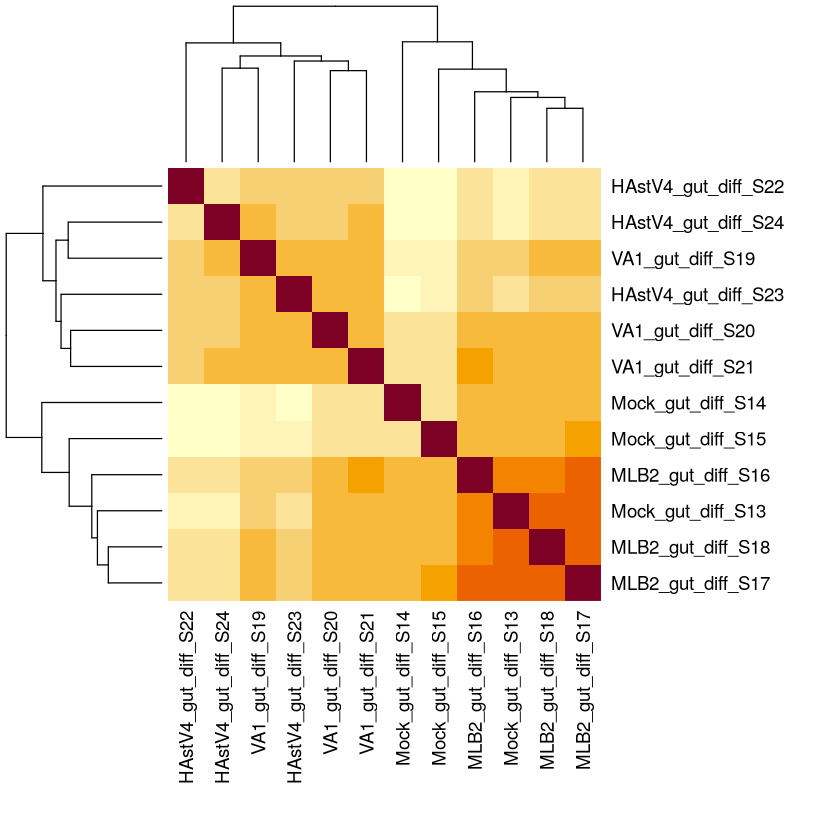

In [11]:
# heatmap for nofiltered deseq data
#pdf('../../figures/gut/05_gdiff_human_heatmap_nofiltered genes.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
##cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(12,12))
#dev.off()


FALSE  TRUE 
 5835 14235 

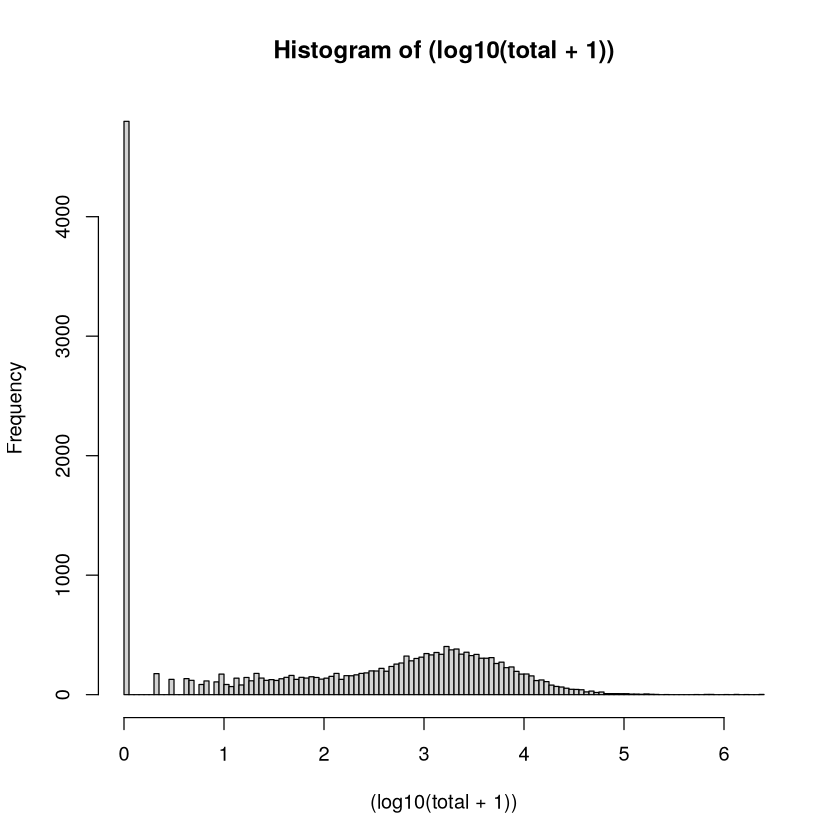

In [41]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [42]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 602 genes have ≥10 reads in two samples))
ngdiffsamples10 = rowSums(counts(deseq)>=10)
table(ngdiffsamples10)

ngdiffsamples10
   0    1    2    3    4    5    6    7    8    9   10   11   12 
6093 1113  602  466  361  350  302  285  358  469  552 1004 8115 

In [43]:
dim(deseq)

[1] 20070    12

In [44]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [45]:
dim(deseq)

[1] 12262    12

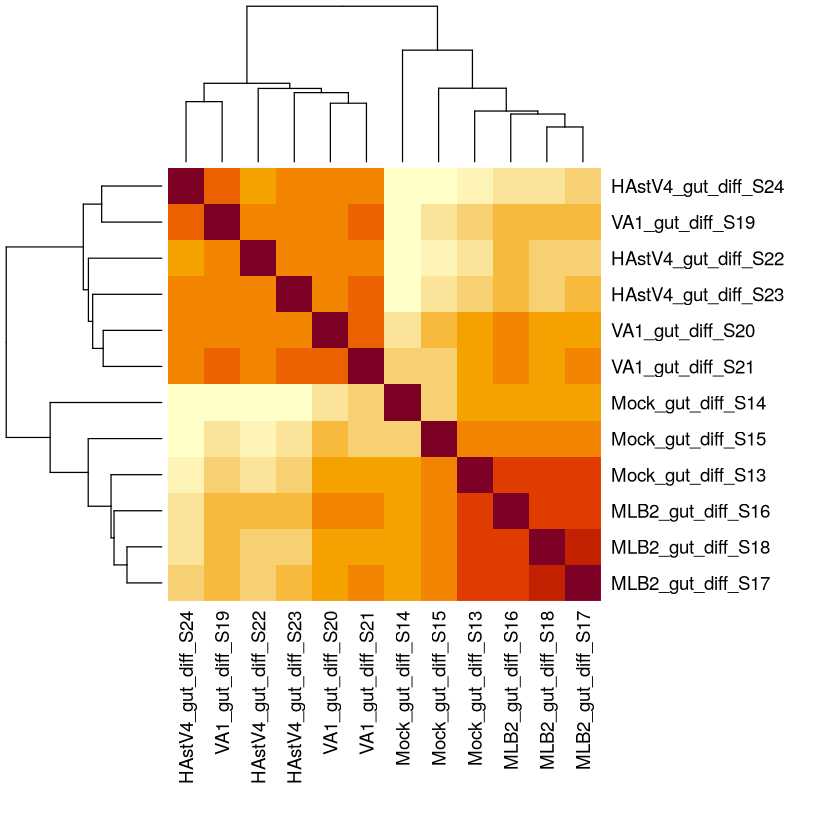

In [19]:
# heatmap for filtered deseq data (genes that have at least 10 reads in 3 or more samples)
#pdf('../../figures/gut/05_gdiff_human_heatmap_filtered genes.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
##cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(12,12))
#dev.off()

all viruses together

In [46]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [47]:
#deseq with where contrast using Mock/virus
cnds = c('MLB2','VA1','HAstV4')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition',c, 'Mock'), independentFiltering=FALSE))
names(res) = cnds

In [40]:
#deseq with where contrast using virus/Mock
#cnds = c('MLB2','VA1','HAstV4')
#res = lapply(cnds,function(c)results(deseq,contrast = c('condition','Mock',c), independentFiltering=FALSE))
#names(res) = cnds

In [41]:
#resultsNames(deseq)

[1] "Intercept"                "condition_MLB2_vs_HAstV4"
[3] "condition_Mock_vs_HAstV4" "condition_VA1_vs_HAstV4"

In [48]:
res

$MLB2
log2 fold change (MLE): condition MLB2 vs Mock 
Wald test p-value: condition MLB2 vs Mock 
DataFrame with 12262 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat    pvalue
                  <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000142611   238.35243      -0.733489  0.354602 -2.068485 0.0385944
ENSG00000157911    69.60364      -0.298213  0.602517 -0.494946 0.6206384
ENSG00000142655    81.05993       0.235977  0.598687  0.394157 0.6934653
ENSG00000149527     8.75955      -0.204950  2.026967 -0.101112 0.9194618
ENSG00000171621    88.93261      -0.143512  0.431620 -0.332497 0.7395139
...                     ...            ...       ...       ...       ...
ENSG00000198695   439.76014       0.264051  0.434450  0.607783  0.543332
ENSG00000198727 51672.06649       0.041342  0.189881  0.217727  0.827642
ENSG00000276256    10.72758      -0.707396  1.923875 -0.367693  0.713102
ENSG00000273748    38.31067      -0.460981  0.735482 -0.6267

In [49]:
saveRDS(res,'../../rds/deseq2_gut_diff_mockvirus.rds')

Loading required package: ggplot2

Loading required package: ggrepel



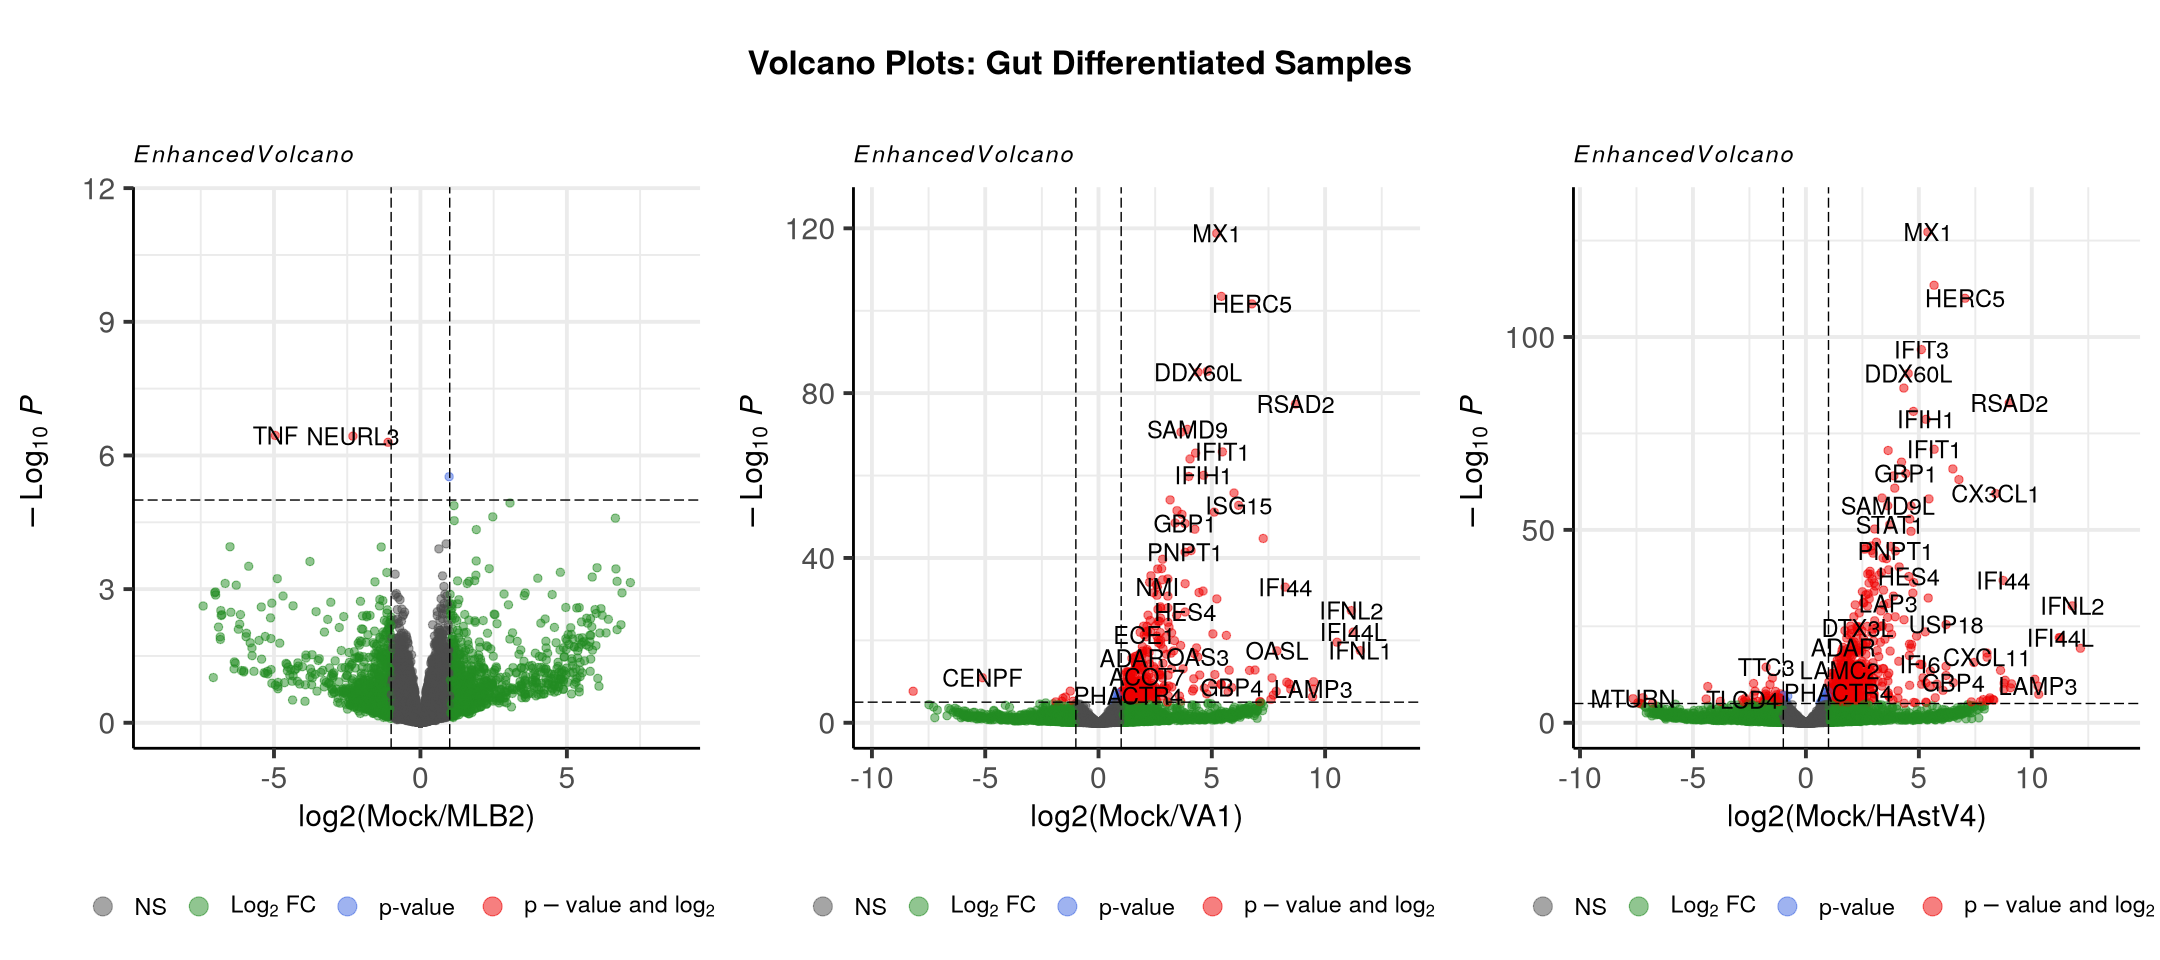

In [50]:
options(repr.plot.width = 18, repr.plot.height = 8)  # Increase height for legends

library(EnhancedVolcano)
library(cowplot)
library(ggplot2)  # Нужно для `ggdraw()`

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = ggenes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = paste0('log2(Mock/', vir_name, ')'),
        title = NULL,  # Remove individual titles
        caption = NULL
    ) + theme(legend.position = "bottom")  # Move legend below each plot
}

# Create a common title with more space
title <- ggdraw() + draw_label("Volcano Plots: Gut Differentiated Samples", 
                               fontface = 'bold', size = 20, hjust = 0.5)

# Arrange all plots in one row with enough space for the title & legends
final_plot <- plot_grid(title, 
                        plot_grid(plotlist = plots, nrow = 1, ncol = 3, 
                                  align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
                        ncol = 1, rel_heights = c(0.15, 1))  # More space for title

# Display the final plot
print(final_plot)

In [51]:
ggsave("06_volcano_gut_diff.png", final_plot, width = 24, height = 10, dpi = 300)

In [21]:
#This returns a named vector with the count of significantly differentially expressed genes for each condition
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          8         733        1546

In [22]:
lapply(res, function(x) {
    f = x$padj < 0.05 & abs(x$log2FoldChange) > 1  # Add log2FoldChange condition
    f[is.na(f)] = FALSE  # Handle NA values
    x = as.data.frame(x[f, c(1,2,6)])  # Select relevant columns
    x$gene_name = ggenes[rownames(x), 'gene_name']  # Add gene names
    x[order(x$log2FoldChange), ]  # Order by log2FoldChange
})



,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000077348,15.67334,-6.656589,0.03915939,EXOSC5
ENSG00000137965,398.86189,-3.058457,0.02726851,IFI44
ENSG00000120937,102.61234,-2.469179,0.03915939,NPPB
ENSG00000163735,2744.35324,-1.152945,0.03952958,CXCL5
ENSG00000118523,1997.53544,-1.144601,0.02726851,CCN2
ENSG00000125148,3830.35105,1.102850,0.00207065,MT2A
ENSG00000163121,210.98591,2.305878,0.00207065,NEURL3
ENSG00000232810,165.61878,4.957630,0.00207065,TNF
,baseMean,log2FoldChange,padj,gene_name


In [23]:
lapply(names(res), function(cond) {
    x <- res[[cond]]  # Extract results for each virus
    
    # Apply filtering: padj < 0.1 and abs(log2FoldChange) > 1
    f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
    f[is.na(f)] <- FALSE  # Handle NA values

    # Convert to dataframe and add gene names
    df <- as.data.frame(x[f, c(1, 2, 6)])  
    df$gene_name <- ggenes[rownames(df), 'gene_name']

    # Sort by log2FoldChange
    df <- df[order(df$log2FoldChange), ]

    # Save to CSV file
    filename <- paste0(cond, "_gdiff_Significant_Genes.csv")  
    write.csv(df, file = filename, row.names = FALSE)

    # Print first few rows for review
    cat("\nFirst few rows for", cond, ":\n")
    print(head(df))

    return(df)  # Optional: return dataframe
})




First few rows for MLB2 :
                  baseMean log2FoldChange       padj gene_name
ENSG00000077348   15.67334      -6.656589 0.03915939    EXOSC5
ENSG00000137965  398.86189      -3.058457 0.02726851     IFI44
ENSG00000120937  102.61234      -2.469179 0.03915939      NPPB
ENSG00000163735 2744.35324      -1.152945 0.03952958     CXCL5
ENSG00000118523 1997.53544      -1.144601 0.02726851      CCN2
ENSG00000125148 3830.35105       1.102850 0.00207065      MT2A

First few rows for VA1 :
                baseMean log2FoldChange         padj gene_name
ENSG00000182393 697.7693     -11.554678 4.344011e-16     IFNL1
ENSG00000137959 802.4046     -11.243516 1.920354e-20    IFI44L
ENSG00000183709 932.9079     -11.158539 1.512440e-25     IFNL2
ENSG00000197110 668.7982     -10.527047 4.597458e-18     IFNL3
ENSG00000271503 173.2324      -9.491877 7.880151e-09      CCL5
ENSG00000078081 295.9251      -9.477079 3.650838e-07     LAMP3

First few rows for HAstV4 :
                 baseMean log2FoldCh

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000077348,15.67334,-6.656589,0.03915939,EXOSC5
ENSG00000137965,398.86189,-3.058457,0.02726851,IFI44
ENSG00000120937,102.61234,-2.469179,0.03915939,NPPB
ENSG00000163735,2744.35324,-1.152945,0.03952958,CXCL5
ENSG00000118523,1997.53544,-1.144601,0.02726851,CCN2
ENSG00000125148,3830.35105,1.102850,0.00207065,MT2A
ENSG00000163121,210.98591,2.305878,0.00207065,NEURL3
ENSG00000232810,165.61878,4.957630,0.00207065,TNF
,baseMean,log2FoldChange,padj,gene_name


In [24]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          8         733        1546

In [25]:
resultsNames(deseq)


[1] "Intercept"                "condition_MLB2_vs_HAstV4"
[3] "condition_Mock_vs_HAstV4" "condition_VA1_vs_HAstV4"

In [20]:
summary(res$MLB2)



out of 12315 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 40, 0.32%
LFC < 0 (down)     : 59, 0.48%
outliers [1]       : 1, 0.0081%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [21]:
lapply(res,function(x){
    f = x$padj<0.1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000197191,7.953750,-6.8745849,0.0421718505,CYSRT1
ENSG00000128536,10.269732,-6.6805162,0.0382399174,CDHR3
ENSG00000160781,10.821793,-6.4406803,0.0394054742,PAQR6
ENSG00000083807,11.028471,-6.1716417,0.0800530854,SLC27A5
ENSG00000174951,12.346851,-6.1340610,0.0537499941,FUT1
ENSG00000100490,12.034991,-5.9352519,0.0432627748,CDKL1
ENSG00000167914,8.171199,-5.6194487,0.0873580987,GSDMA
ENSG00000176749,24.706448,-5.5796164,0.0288882467,CDK5R1
ENSG00000136982,12.499450,-5.3605871,0.0831772296,DSCC1


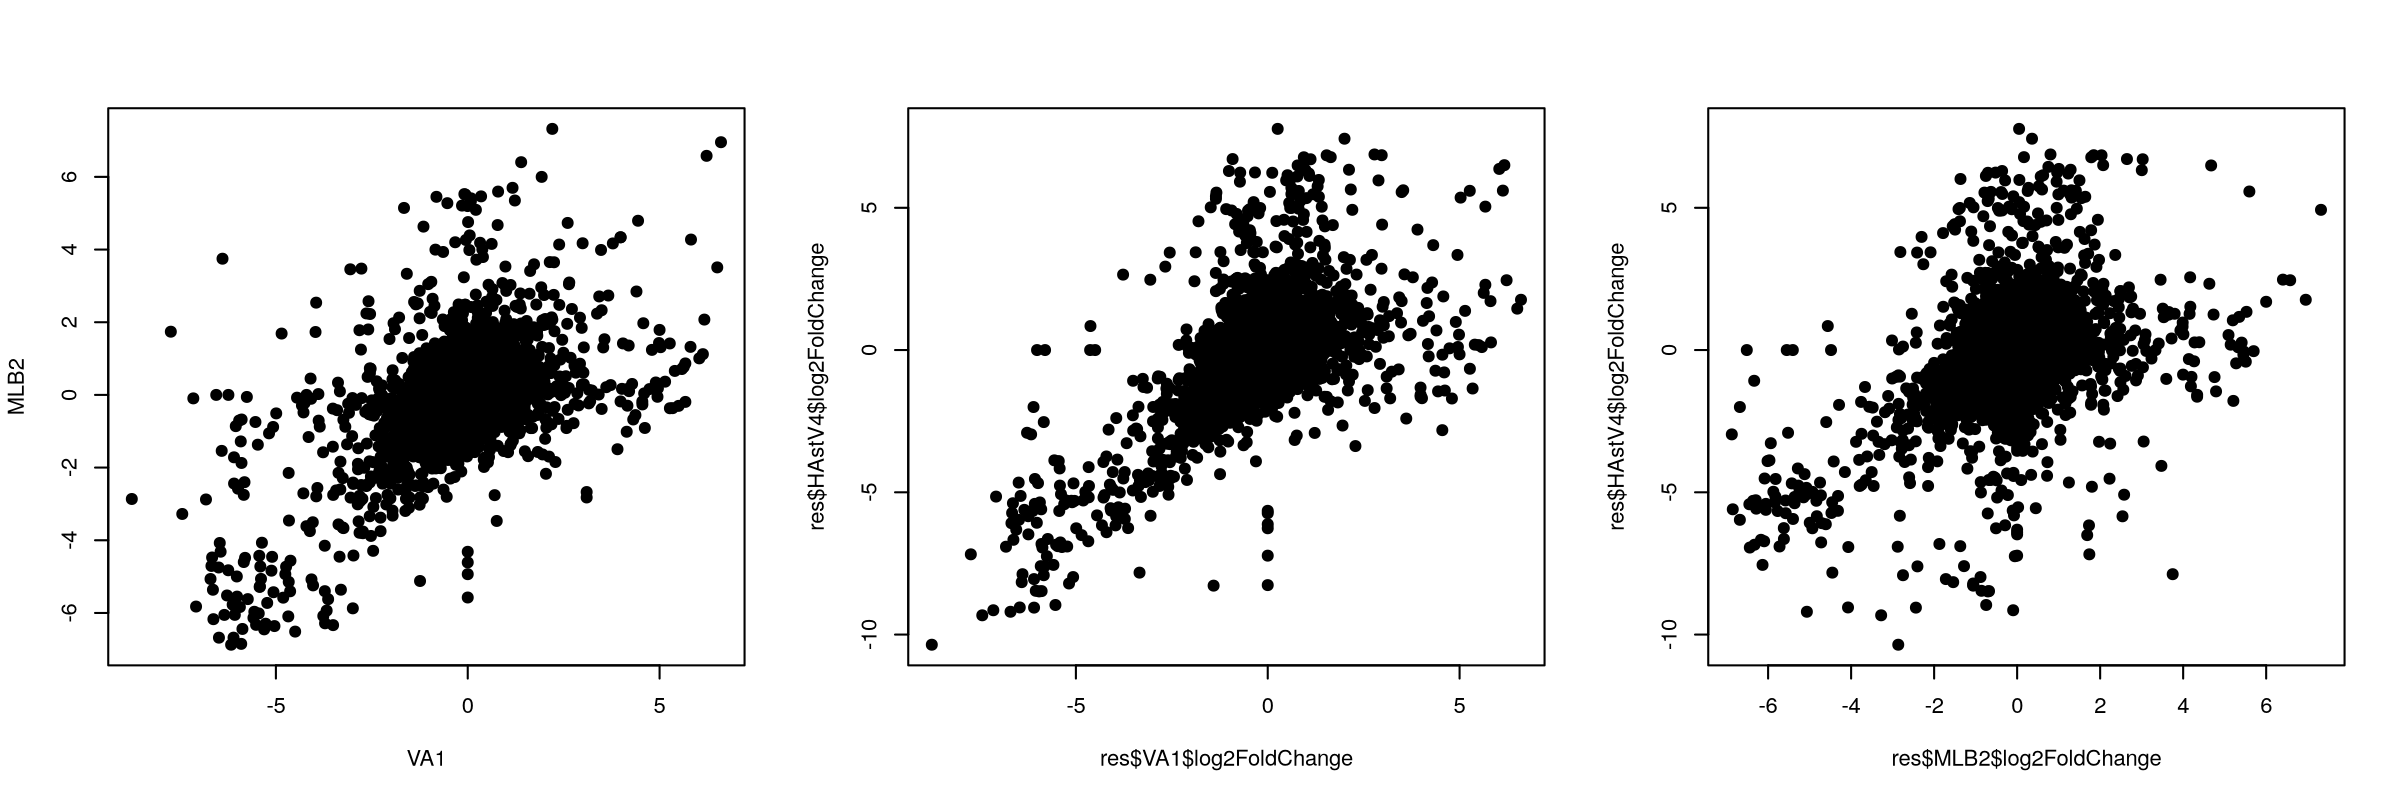

In [22]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
par(mfrow=c(1,3))
plot(res$VA1$log2FoldChange,res$MLB2$log2FoldChange,pch=19,xlab='VA1',ylab='MLB2')
plot(res$VA1$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)
plot(res$MLB2$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)

In [23]:
summary(res)

       Length Class        Mode
MLB2   6      DESeqResults S4  
VA1    6      DESeqResults S4  
HAstV4 6      DESeqResults S4  

In [25]:
#total number of significant genes across all condition
sum(sapply(res, function(x) sum(x$padj < 0.1, na.rm=TRUE)))

[1] 2490

In [46]:
f = res$MLB2$log2FoldChange>5 & res$VA1$log2FoldChange>5
sel = res$VA1[f,]
cbind(sel,ggenes[rownames(sel),'gene_name'])

DataFrame with 2 rows and 7 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000146267   4.87637        6.22526   2.49743   2.49267 0.0126787
ENSG00000196787   6.92157        6.60054   3.92917   1.67988 0.0929809
                     padj ggenes[rownames(sel), "gene_name"]
                <numeric>                        <character>
ENSG00000146267  0.171243                               FAXC
ENSG00000196787  0.497379                             H2AC11

one by one virus

In [33]:
cnds = c('MLB2','VA1','HAstV4')
res2 = lapply(cnds,function(c){
    f = gundiffsamples$condition %in% c('Mock',c)
    x = DESeqDataSetFromMatrix(countData = gpccounts[rownames(deseq),f],
                              colData = gundiffsamples[f,],
                               design = ~ condition)
    x = DESeq(x)
    results(x,contrast = c('condition','Mock',c))
    })
names(res2) = cnds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [34]:
sapply(res2,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          1         184         429

In [80]:
lapply(res2,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                  baseMean log2FoldChange         padj gene_name
ENSG00000120549   50.11983     -4.3107052 9.116530e-03  KIAA1217
ENSG00000113916  329.08347     -1.7771185 9.116530e-03      BCL6
ENSG00000175745 2845.38028     -1.3114488 2.855825e-10     NR2F1
ENSG00000185551  784.99483     -1.2094494 1.251884e-02     NR2F2
ENSG00000155760  743.14437     -1.1657653 1.612199e-02      FZD7
ENSG00000076356  866.34010     -0.9563526 1.251884e-02    PLXNA2
ENSG00000150471 1322.71527     -0.8491035 1.694817e-02    ADGRL3

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  29.80181      -8.276538 0.026715567     OSTF1
ENSG00000168298 260.86893       1.967433 0.003780188      H1-4

In [81]:
lapply(res,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                baseMean log2FoldChange      padj gene_name
ENSG00000120549 56.63175      -4.308327 0.0439467  KIAA1217

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  22.01903      -8.276014 0.011766177     OSTF1
ENSG00000117707  71.74382      -2.909794 0.011766177     PROX1
ENSG00000168298 251.87897       1.967959 0.001240352      H1-4

#res and res2 - data from "all virus together' and "one virus by one"